<a href="https://colab.research.google.com/github/akki-kittu/SML_2303A52027/blob/main/SML_PROJECT_1026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
import numpy as np
import pandas as pd
df = "/content/drive/MyDrive/archive (1).zip"
pd.read_csv(df)


,Heart_Rate_Variability,Body_Temperature,Movement_During_Sleep,Sleep_Duration_Hours,Sleep_Quality_Score,Caffeine_Intake_mg,Stress_Level,Bedtime_Consistency,Light_Exposure_hours
0,79.934283,37.199678,1.324822,4.638289,1.000000,107.624032,2.771837,0.657037,7.933949
1,67.234714,36.962317,1.855481,6.209422,1.000000,104.658589,3.738138,0.144464,6.992699
2,82.953771,36.529815,1.207580,6.879592,10.000000,0.000000,3.115880,0.642949,7.655250
3,100.460597,36.176532,1.692038,10.331531,1.000000,116.990981,3.904008,0.453255,9.429463
4,65.316933,36.849112,0.106385,8.334830,1.000000,223.282908,4.571699,0.641492,10.555713
...,...,...,...,...,...,...,...,...,...
995,64.377994,37.035075,2.077481,7.542686,1.000000,167.146932,4.404266,0.941971,8.203260
996,105.953731,36.486739,2.257753,4.383282,1.000000,265.264810,6.538063,0.565399,10.334435
997,82.816857,36.059063,0.758239,7.019553,8.445252,28.259621,3.945222,0.332975,11.176894
998,58.576420,36.418467,2.334176,9.965067,1.000000,196.795042,4.989787,0.830583,6.630026


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn import metrics


data = pd.read_csv('/content/drive/MyDrive/archive (1).zip')

X = data.iloc[:, :-1]
y = data.iloc[:, -1]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=40)

In [ ]:
 lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print('Linear Regression Metrics:')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

Linear Regression Metrics:
Mean Absolute Error: 1.6216188155326008
Mean Squared Error: 4.00979602111346
Root Mean Squared Error: 2.002447507704874



Decision Tree Metrics:
Mean Absolute Error: 1.928403175738973
Mean Squared Error: 5.480310722294637
Root Mean Squared Error: 2.3410063481961423


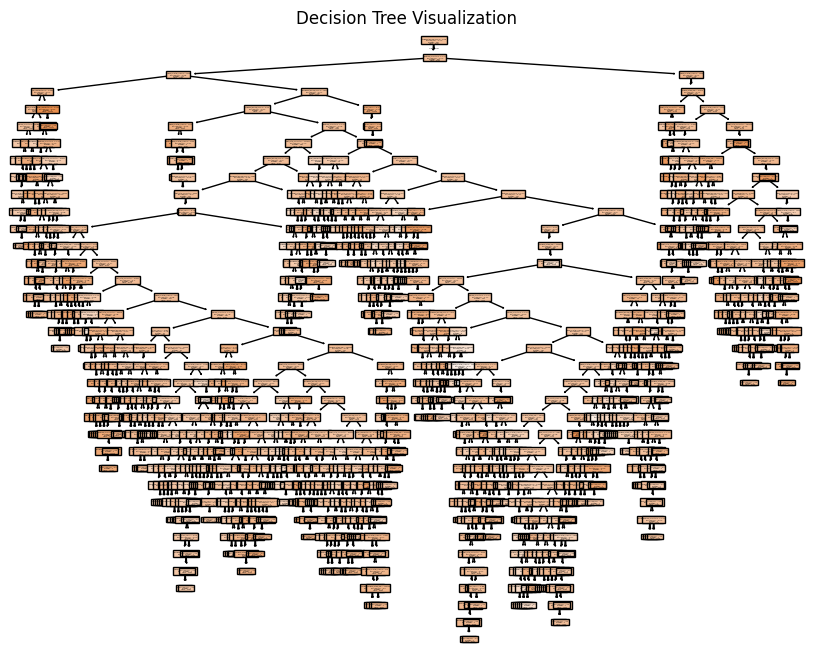

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print('\nDecision Tree Metrics:')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_dt))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_dt))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt)))

plt.figure(figsize=(10, 8))
from sklearn import tree
tree.plot_tree(dt_model, feature_names=X.columns, filled=True)
plt.title("Decision Tree Visualization")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print('\nRandom Forest Metrics:')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))



Random Forest Metrics:
Mean Absolute Error: 1.633904765314893
Mean Squared Error: 4.1050986825318025
Root Mean Squared Error: 2.0261043118585484


In [ ]:
feature_importances = rf_model.feature_importances_
print("\nFeature Importances:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {feature_importances[i]}")



Feature Importances:
Heart_Rate_Variability: 0.15450327359417726
Body_Temperature: 0.1311597523202655
Movement_During_Sleep: 0.15840694324995247
Sleep_Duration_Hours: 0.13955007256582017
Sleep_Quality_Score: 0.028759955578143884
Caffeine_Intake_mg: 0.11398521343555798
Stress_Level: 0.1304215884967805
Bedtime_Consistency: 0.14321320075930224


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/archive (1).zip')

# Define target variable
target = 'Sleep_Quality_Score'

# Define features
features = ['Body_Temperature', 'Movement_During_Sleep', 'Sleep_Duration_Hours', 'Heart_Rate_Variability']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Create logistic regression model
model = LogisticRegression(max_iter=1000)

# Train model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.